In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib inline

In [10]:
def table_zeros(N):
    """
    Table of zeros
    Gives a np.array of zeros of
    N x N dimensions 
    """
    if not isinstance(N, int):
        print("Non-integer input given to function table_zeros; N = " + str(N))
        return 0
    
    table = np.zeros((N, N))
    return table

def create_table(N, arr):
    """
    Creates a table with not-null entries
    in the positions of arr
    """
    if not isinstance(N, int):
        print("Non-integer input given to function create_table; N = " + str(N))
        return 0
    
    table = table_zeros(N)
    for i in range(len(arr)):
        table[arr[i, 0], arr[i, 1]] = 1
    return table 

def pad_with(vector, pad_width, iaxis, kwargs):
    """
    Sorrounds a square matrix with null rows
    and coloumns
    """
    pad_value = kwargs.get('padder', 10)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value
    pass

def sorround_zeros(T):
    """
    Sorround the square table matrix with a 
    row and a column of zeros. 
    """
    ans = np.pad(T, 1, pad_with, padder = 0)
    return ans    

def sum_neighbours(T, i, j):
    """
    Calculate the sum of the neighbours of the 
    (i,j) element of the table T matrix. 
    """
    T_pad = sorround_zeros(T)
    i += 1
    j += 1
    above_sum = T_pad[i-1, j-1] + T_pad[i-1, j] + T_pad[i-1, j+1]
    middle_sum = T_pad[i, j-1] + T_pad[i, j+1]
    below_sum = T_pad[i+1, j-1] + T_pad[i+1, j] + T_pad[i+1, j+1]
    return above_sum + middle_sum + below_sum

def evolve_matrix(T):
    """
    Evolves the table T matrix
    one step in time. 
    """
    T_new = np.copy(T)
    for i in range(T.shape[0]):
        for j in range(T.shape[1]):
            if T[i, j] == 1:
                if sum_neighbours(T, i, j) > 3:
                    T_new[i, j] = 0
                elif sum_neighbours(T, i, j) < 2:
                    T_new[i, j] = 0
            elif T[i, j] == 0 and sum_neighbours(T, i, j) == 3:
                T_new[i, j] = 1
    return T_new

def evolve_n_steps(T, steps):
    """
    Evolves the table T matrix
    n steps in time. 
    """
    if steps == 0:
        return T
    if steps > 0:
        T_new = evolve_matrix(T)
        return evolve_n_steps(T_new, steps - 1)
    
def list_of_frames(T, steps):
    """
    Creates a list of tables starting
    from the initial one T and making it 
    evolve a given number of steps.
    """
    if steps == 0:
        return np.array([T])
    if steps > 0:
        T_new = evolve_matrix(T)
        ans = np.concatenate(( np.array([T]), list_of_frames(T_new, steps - 1) ))
    return ans


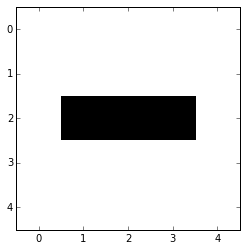

In [12]:
# Creates the "blinker" oscillator
T = create_table(5, np.array([[1, 2], [2, 2], [3,2]]))
T_new = evolve_matrix(T)
frames = list_of_frames(T, 50)

# Create figure to save the video 
fig = plt.figure()
i = 0
im = plt.imshow(frames[0], cmap = 'Greys', interpolation='nearest', animated=True)

# Update the figure 
def updatefig(*args):
    global i
    if (i < len(frames) - 1):
        i += 1
    else:
        i=0
    im.set_array(frames[i])
    return im,

# Creates the animation
ani = animation.FuncAnimation(fig, updatefig,  blit=True, interval = 100)
plt.show()

# Save the video 
ani.save("movie_blinker.mp4")


# In case you want to use Google's Colab 
# use the next two lines. 

# from google.colab import files
# files.download("movie_test.mp4")

In [13]:
type(T)

numpy.ndarray

In [27]:
# Creates the "pulsar" oscillator
pulsar_indices = np.array([ 
                        [2, 4], [2, 5], [2, 6], [2, 10], [2, 11], [2, 12],
                        [4, 2], [4, 7], [4, 9], [4, 14],
                        [5, 2], [5, 7], [5, 9], [5, 14],
                        [6, 2], [6, 7], [6, 9], [6, 14],
                        [7, 4], [7, 5], [7, 6], [7, 10], [7, 11], [7, 12],
                        [9, 4], [9, 5], [9, 6], [9, 10], [9, 11], [9, 12],
                        [10, 2], [10, 7], [10, 9], [10, 14],
                        [11, 2], [11, 7], [11, 9], [11, 14],
                        [12, 2], [12, 7], [12, 9], [12, 14],
                        [14, 4], [14, 5], [14, 6], [14, 10], [14, 11], [14, 12],
                          ])

T_pulsar = create_table(17, pulsar_indices)
T_pulsar_new = evolve_matrix(T_pulsar)


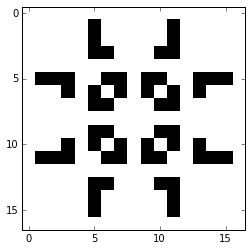

In [30]:
frames_pulsar = list_of_frames(T_pulsar, 50)

# Create figure to save the video 
fig = plt.figure()
i = 0
im = plt.imshow(frames_pulsar[0], cmap = 'Greys', interpolation='nearest', animated=True)

# Update figure 
def updatefig(*args):
    global i
    if (i < len(frames_pulsar) - 1):
        i += 1
    else:
        i=0
    im.set_array(frames_pulsar[i])
    return im,

# Create the animation
ani = animation.FuncAnimation(fig, updatefig,  blit=True, interval = 200)
plt.show()

# Save the video 
ani.save("movie_pulsar.mp4")

In [39]:
# Creates the "penta-decathlon" oscillator
d = 3
pentad_indices = np.array([ [5, 4+d], [5, 5+d], [5, 6+d],
                           [6, 4+d], [6, 6+d],
                           [7, 4+d], [7, 5+d], [7, 6+d],
                           [8, 4+d], [8, 5+d], [8, 6+d],
                           [9, 4+d], [9, 5+d], [9, 6+d],
                           [10, 4+d], [10, 5+d], [10, 6+d],
                           [11, 4+d], [11, 6+d],
                           [12, 4+d], [12, 5+d], [12, 6+d],
                          ])

T_pentad = create_table(18, pentad_indices)
T_pentad_new = evolve_matrix(T_pentad)

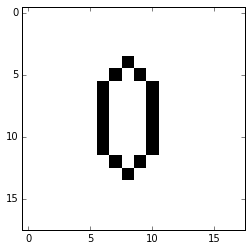

In [40]:
frames_pentad = list_of_frames(T_pentad, 50)

# Create the figure 
fig = plt.figure()
i = 0
im = plt.imshow(frames_pentad[0], cmap = 'Greys', interpolation='nearest', animated=True)

# Update the figure
def updatefig(*args):
    global i
    if (i < len(frames_pentad) - 1):
        i += 1
    else:
        i=0
    im.set_array(frames_pentad[i])
    return im,

# Create the animation
ani = animation.FuncAnimation(fig, updatefig,  blit=True, interval = 200)
plt.show()

# Save the figure 
ani.save("movie_pentadecathlon.mp4")

In [56]:
# Creates the "Glider" 
glider_indices = np.array([ [1, 1], [2, 2], [2, 3],
                           [3, 1], [3, 2]
                          ])

T_glider = create_table(25, glider_indices)
T_glider_new = evolve_matrix(T_glider)

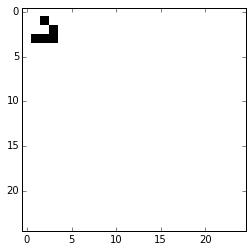

In [58]:
frames_glider = list_of_frames(T_glider, 50)

# Create the figure
fig = plt.figure()
i = 0
im = plt.imshow(frames_glider[0], cmap = 'Greys', interpolation='nearest', animated=True)

# Update the figure
def updatefig(*args):
    global i
    if (i < len(frames_glider) - 1):
        i += 1
    else:
        i=0
    im.set_array(frames_glider[i])
    return im,

# Create animation
ani = animation.FuncAnimation(fig, updatefig,  blit=True, interval = 200)
plt.show()

# Save the video 
ani.save("movie_glider.mp4")